# DTSC-670Final Project
Name: Haneefuddin Rasheed

# Final Project: Predicting Student Performance

## Introduction

In this project, we aim to leverage machine learning techniques to predict student performance within a large Portuguese school system. By analyzing data from two Portuguese schools, we intend to develop a model that forecasts a student's academic outcome based on various features such as demographic, social, and school-related attributes. This initiative is prompted by the school director's vision to proactively identify students who may require additional support, aiming to implement targeted interventions that can significantly enhance their academic achievements.

## Problem Statement

The core objective of this project is to predict the final grade (G3) of students in a math course, which serves as a critical indicator of their academic performance. This prediction model could be instrumental for educators and administrators in crafting personalized educational strategies and support mechanisms for students at risk of underperforming.

## Machine Learning Problem Framing

This project is framed as a **supervised learning** task because we have labeled data (the final grades) to train our model. Supervised learning involves teaching a model to make predictions based on input data and is divided into two main types:

- **Regression:** Predicting a continuous quantity. In our case, predicting the numeric final grade (G3) of students falls under this category.
- **Classification:** Categorizing data into predefined classes. Alternatively, we could frame this as a classification problem if we aim to predict whether a student passes or fails based on their final grade, converting the numeric grade into a binary outcome.

Given the nature of our data and the specific requirements of our stakeholders, we can choose either approach based on the insights we wish to derive and the interventions we aim to support.

### Why Online or Offline?

- **Online learning** systems learn incrementally from a stream of incoming data. This approach is not applicable to our scenario because our data is static and collected from historical records.
- **Offline learning**, also known as batch learning, suits our project better because we train our model on the entire dataset at once, which is available to us in a static form.

## Metrics for Model Evaluation

For a **regression task**, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R²), which provide different perspectives on the model's prediction accuracy and performance.

For a **classification task**, accuracy, precision, recall, F1 score, and AUC-ROC could be considered, depending on the specific objectives and the balance of the classes (pass/fail rates) in our dataset.

## Additional Considerations

It's essential to consider the implications of our model's predictions and ensure that interventions based on these predictions do justice to the students' diverse needs. Ethical considerations, data privacy, and the potential for model bias must be addressed throughout the project lifecycle.


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check the size and type of data
print(f"Data shape: {data.shape}")
print(f"Data types:\n{data.dtypes}")

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Update the target_column variable in case 'G3' was affected, which is unlikely but good practice
target_column = 'G3'

# Ensure the target column 'G3' is numeric and not affected by encoding
if data_encoded[target_column].dtype == 'object':
    data_encoded[target_column] = pd.to_numeric(data_encoded[target_column], errors='coerce')

# Split the data into features and target
X = data_encoded.drop(target_column, axis=1)  # Features
y = data_encoded[target_column]               # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the training and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


C:\Users\Haneef\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A     4     4  at_home   teacher   
1     GP   F  17.0       U     GT3       T     1     1  at_home     other   
2     GP   F  15.0       U     LE3       T     1     1  at_home     other   
3     GP   F  15.0       U     GT3       T     4     2   health  services   
4     GP   F   NaN       U     GT3       T     3     3    other     other   

   ... goout Dalc  Walc  health  absences_G1 absences_G2 absences_G3  G1  G2  \
0  ...     4    1     1       3          1.0         1.0         4.0   5   6   
1  ...     3    1     1       3          NaN         NaN         NaN   5   5   
2  ...     2    2     3       3          1.0         1.0         8.0   7   8   
3  ...     2    1     1       5          0.0         0.0         2.0  15  14   
4  ...     2    1     2       5          0.0         0.0         4.0   6  10   

   G3  
0   6  
1   6  
2  10  
3  15  
4  10  

[5 rows

              age        Medu        Fedu  traveltime   studytime    failures  \
count  383.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.699739    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.280615    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

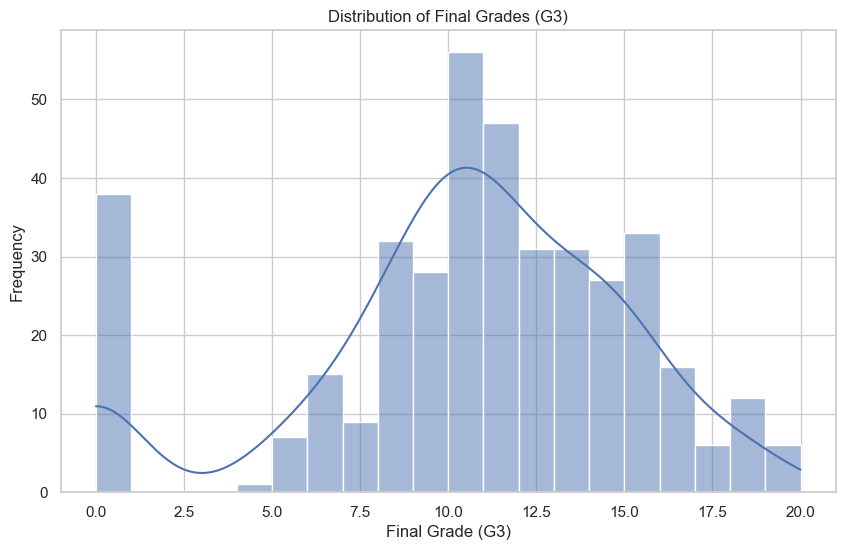

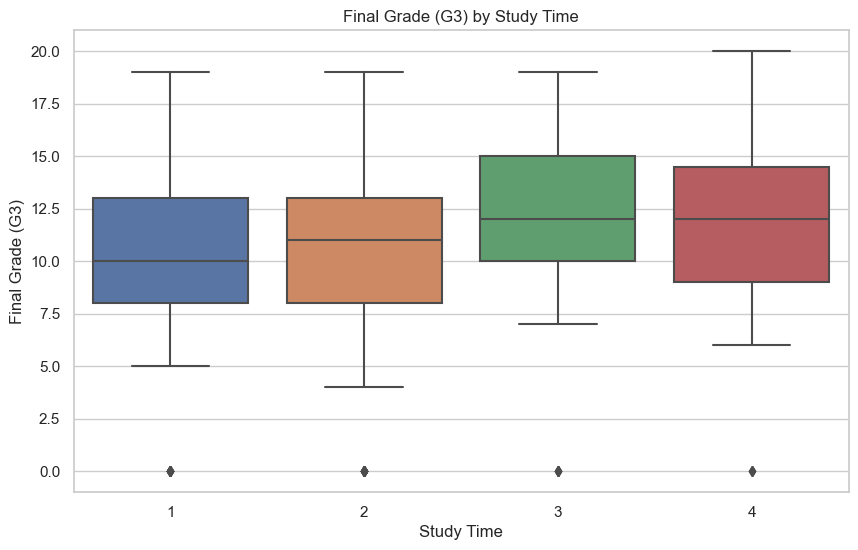

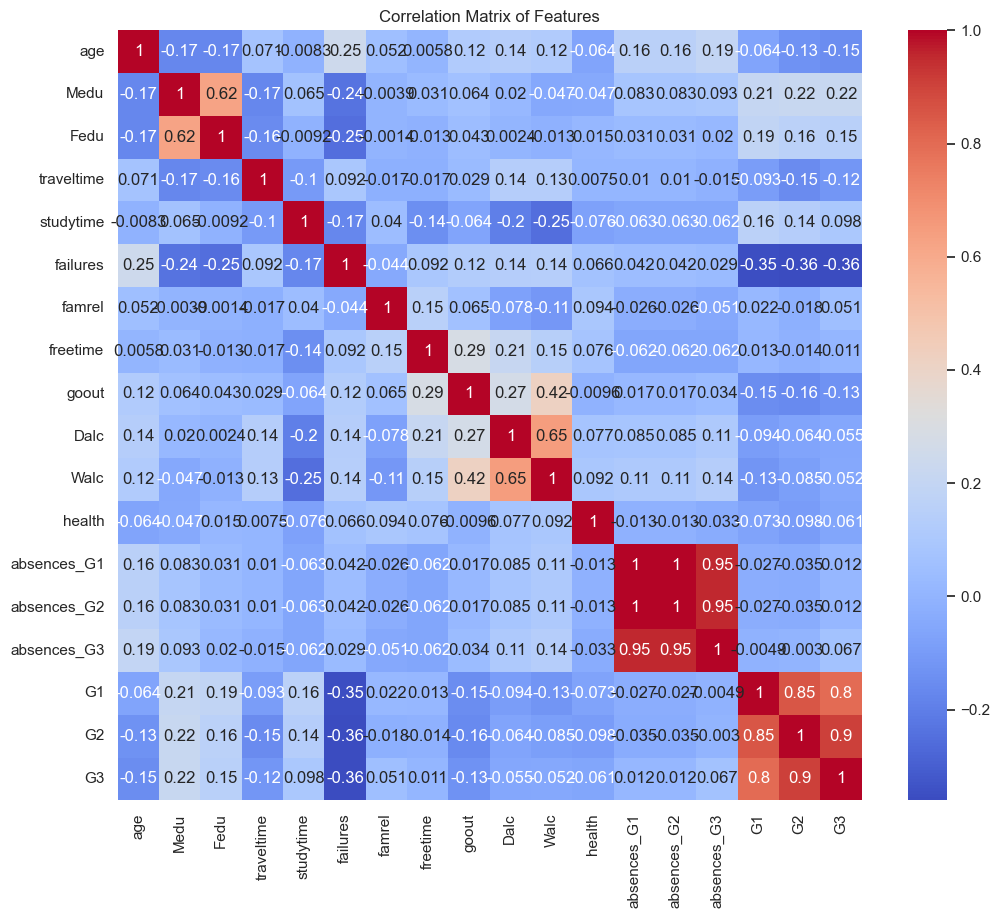

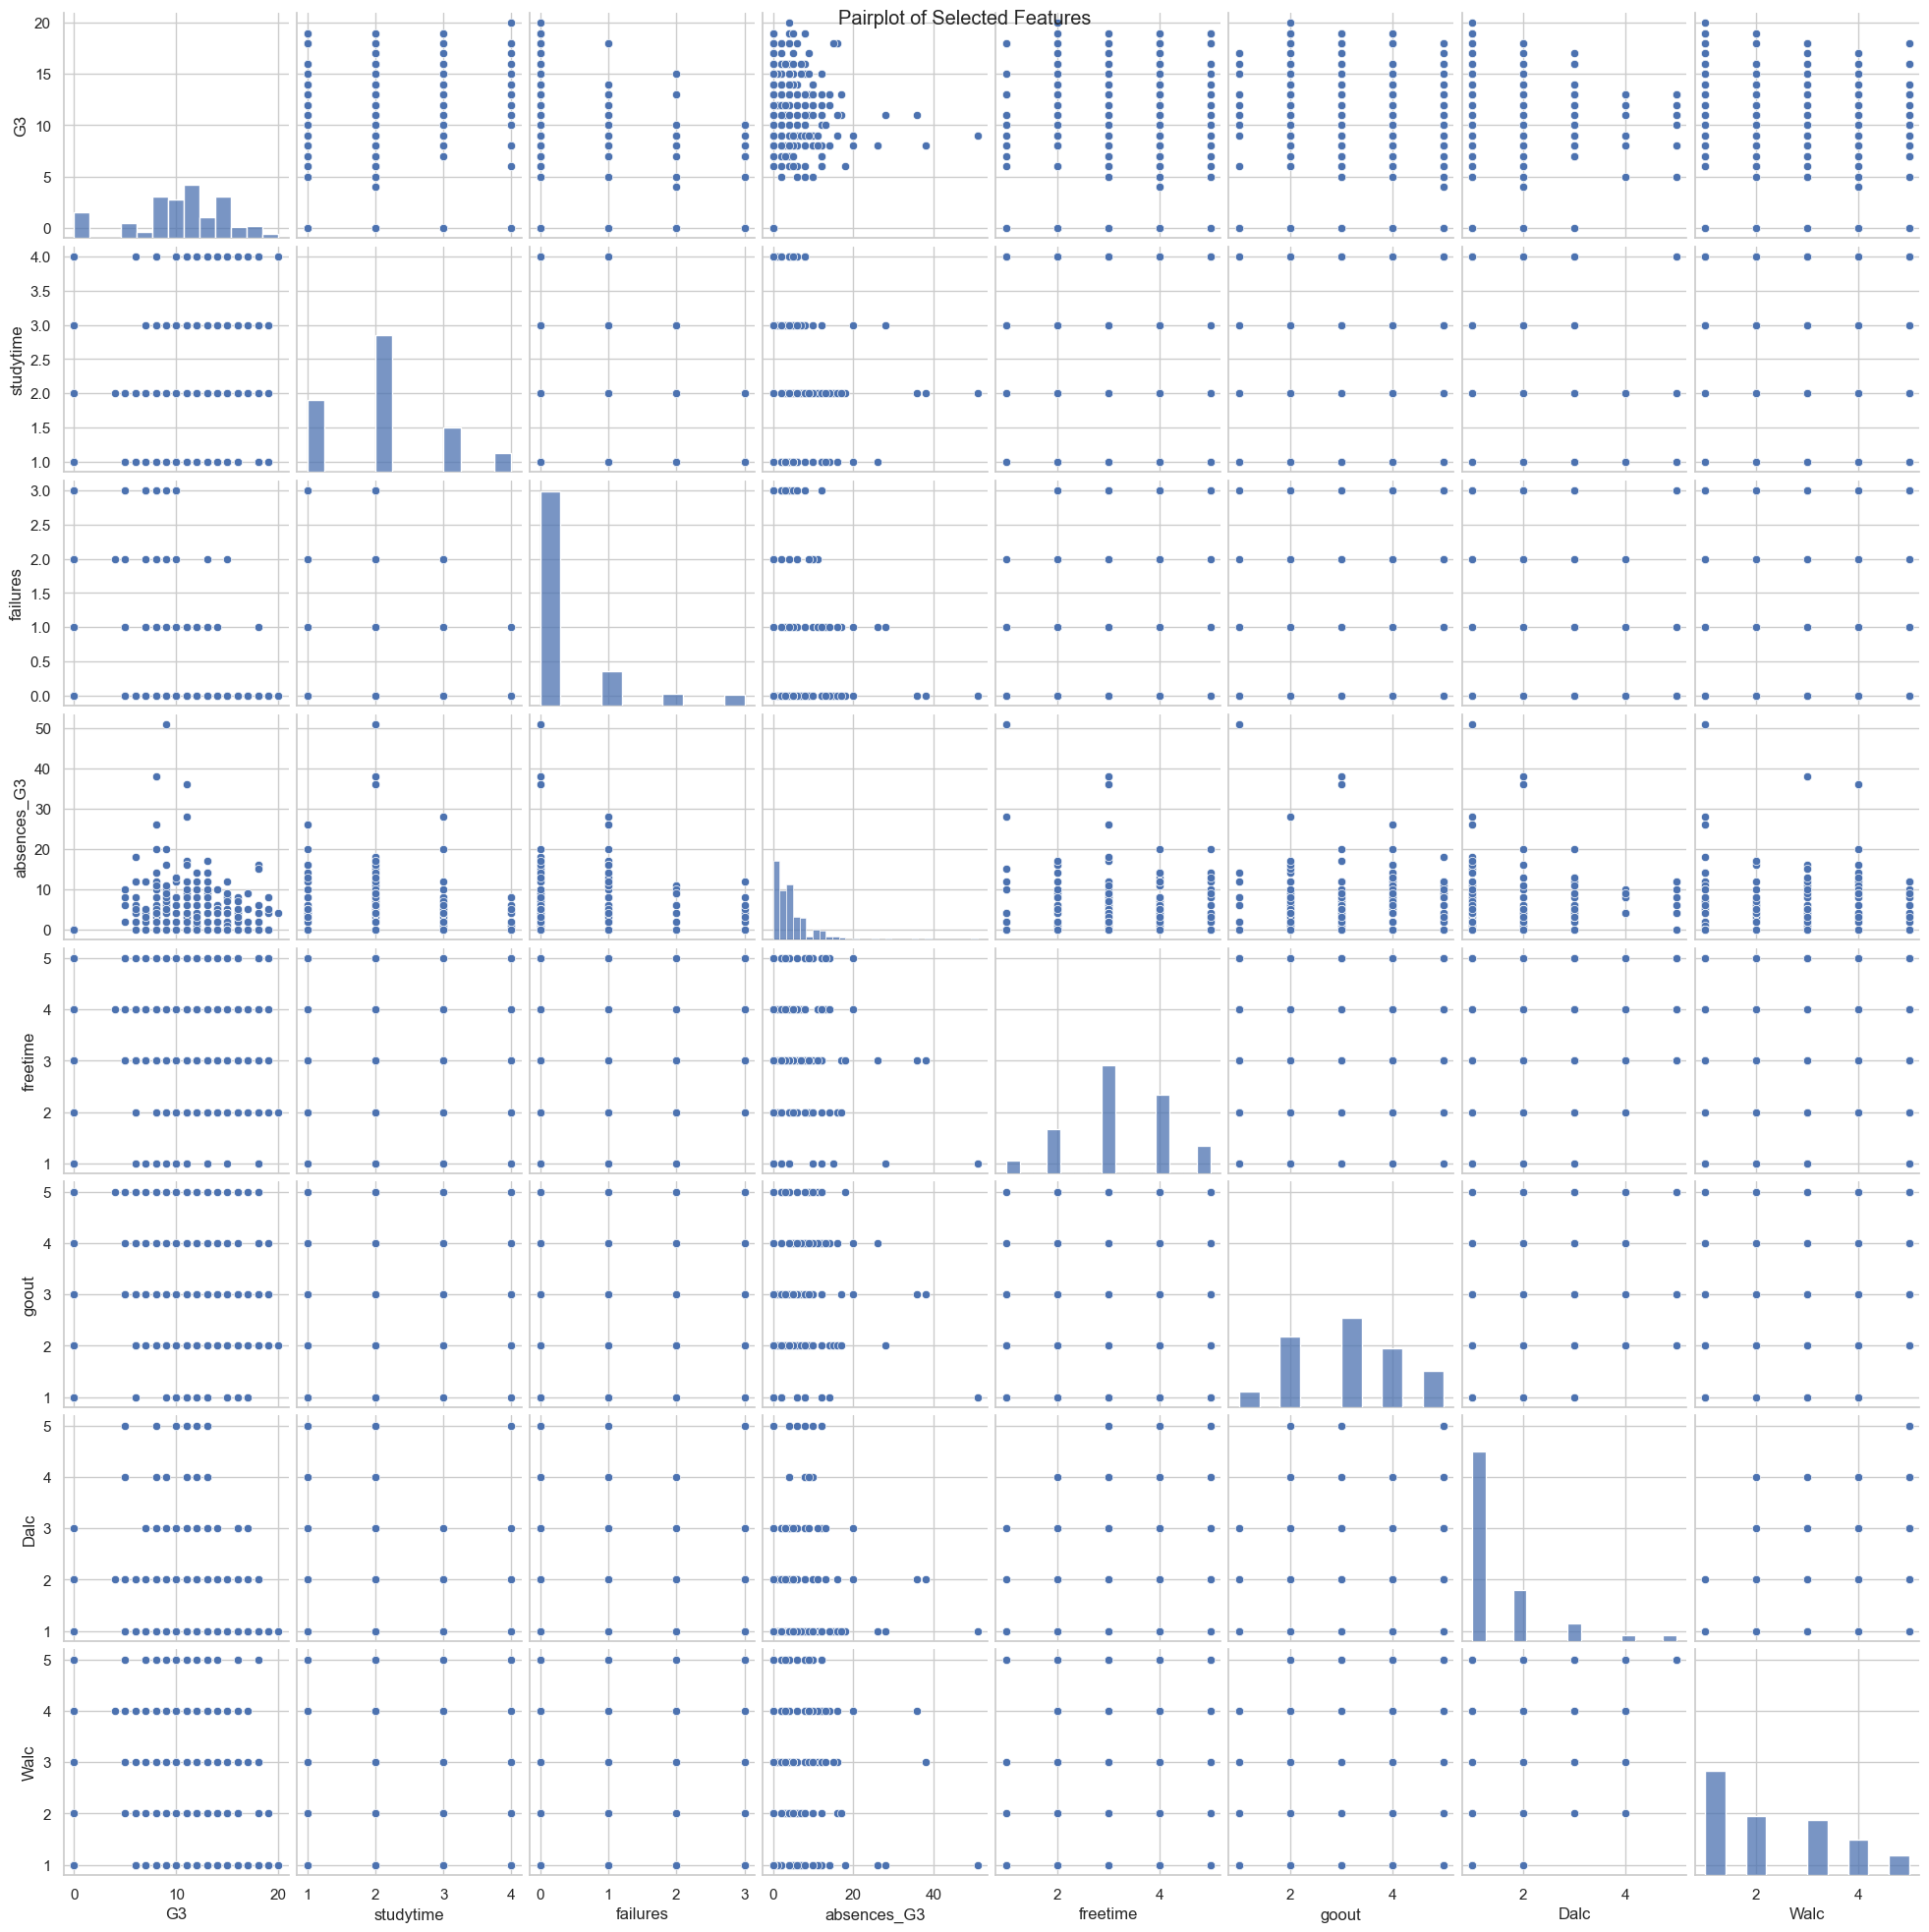

In [2]:
# Basic Statistical Analysis
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Explore distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters in one step.
sns.set(style="whitegrid")

# Distribution of final grades
plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# Distribution of study time with final grades
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Final Grade (G3) by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot for selected features
selected_features = ['G3', 'studytime', 'failures', 'absences_G3', 'freetime', 'goout', 'Dalc', 'Walc']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', verticalalignment='baseline')
plt.show()


# Insights from Data Analysis and Visualization

Based on the comprehensive analysis and visual exploration of the student performance data, we have derived several key insights:

## Final Grades Distribution
The histogram of final grades (G3) reveals a bimodal distribution, indicating two distinct groups of students: one achieving moderate to high grades and another possibly failing or obtaining very low scores. This highlights the variability in student performance within the dataset.

## Study Time vs. Final Grades
Analysis of study time in relation to final grades suggests a correlation where increased study time may be associated with better academic outcomes, as indicated by the boxplot. However, there's considerable variance within each study time category, suggesting that factors beyond study time also significantly influence grades.

## Correlation Insights
- Strong positive correlations between term grades (G1, G2, and G3) suggest that consistent academic performance is a crucial indicator of final grade outcomes.
- Absences (`absences_G3`) show a relatively low correlation with final grades, implying that occasional absences might not severely impact a student's overall performance.
- Lifestyle choices, as reflected in going out (`goout`), weekday (`Dalc`), and weekend alcohol consumption (`Walc`), exhibit low to moderate correlations with final grades. This points to a nuanced relationship between personal behaviors and academic success.

## Pairplot Observations
The pairplot for selected features against the final grade (G3) underscores the detrimental impact of academic failures (`failures`) on student performance. Additionally, while the relationship between absences and grades does not indicate a strong linear pattern, it suggests that other factors play a significant role in influencing academic outcomes.

## Conclusion
These insights emphasize the importance of early academic performance as a predictor of final outcomes, suggest a potential positive impact of increased study time on grades, and highlight the complex influence of lifestyle choices and attendance patterns on academic performance. This analysis forms a foundation for designing targeted interventions to support students at risk, focusing on enhancing study habits, addressing academic challenges promptly, and considering the broader context of each student's life and engagement with education.

The findings from this analysis demonstrate the value of a data-driven approach in educational settings, enabling informed decision-making to improve student outcomes.


# Data Preperation

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Handling missing values - Imputation
imputer = SimpleImputer(strategy='mean')
data[['age', 'absences_G1', 'absences_G2', 'absences_G3']] = imputer.fit_transform(data[['age', 'absences_G1', 'absences_G2', 'absences_G3']])

# Feature selection
features = data.drop(['G3'], axis=1)  # Dropping the target column for feature set
target = data['G3']  # Target column

# Encoding categorical variables and scaling numerical variables
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Applying transformations
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


# Data Preparation

The data preparation phase involves several crucial steps to ensure our dataset is appropriately structured for the modeling process:

1. **Missing Values Handling**: We've applied imputation to handle missing values in columns like `age`, `absences_G1`, `absences_G2`, and `absences_G3`, using the mean strategy for numerical columns.

2. **Feature Selection**: We've separated our dataset into features and target (`G3`), focusing on the features that will be used to predict the final grade.

3. **Encoding and Scaling**: Categorical features are one-hot encoded to convert them into a format that can be provided to ML models, while numerical features are scaled using standard scaling to normalize their ranges.

4. **Data Splitting**: The dataset is split into training and testing sets to evaluate the model's performance on unseen data, ensuring our model is robust and generalizes well.

5. **Preprocessing**: A preprocessing pipeline is applied to the training and testing data, automating the steps of scaling numerical features and encoding categorical features, making our dataset ready for model training.


# Model Selection and Training

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_train_prepared and y_train are defined and prepared previously in your notebook

# Model training and scoring
lin_reg = LinearRegression()
lin_reg_scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

tree_reg = DecisionTreeRegressor()
tree_reg_scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
tree_reg_rmse_scores = np.sqrt(-tree_reg_scores)

forest_reg = RandomForestRegressor()
forest_reg_scores = cross_val_score(forest_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

# Function to display scores in an organized manner
def display_model_scores(model_name, scores):
    print(f"Model: {model_name}")
    print("Scores:", scores)
    print("Mean RMSE:", scores.mean())
    print("Standard deviation:", scores.std())
    print("-------------------------------")  # Separator for readability

# Displaying the scores for each model
display_model_scores("Linear Regression", lin_reg_rmse_scores)
display_model_scores("Decision Tree Regressor", tree_reg_rmse_scores)
display_model_scores("Random Forest Regressor", forest_reg_rmse_scores)


Model: Linear Regression
Scores: [2.0468162  1.97923882 1.1243775  1.74176746 1.80417524 1.66961499
 1.82710572 2.34837698 1.70551436 1.95230246]
Mean RMSE: 1.8199289734769806
Standard deviation: 0.2999205279437573
-------------------------------
Model: Decision Tree Regressor
Scores: [2.         2.66926956 1.32287566 1.0155048  1.35784756 1.40312152
 1.21814243 2.95121626 2.21432288 2.5903045 ]
Mean RMSE: 1.8742605167505708
Standard deviation: 0.6630744125965098
-------------------------------
Model: Random Forest Regressor
Scores: [1.4471459  1.55597136 1.22327174 0.98821493 1.23757702 1.22157813
 1.11508426 2.15635445 1.62708229 1.34666494]
Mean RMSE: 1.3918945010579133
Standard deviation: 0.31505051172926507
-------------------------------


# Observations from Model Evaluation

After training and evaluating three different models to predict student performance, we obtained the following results, summarized by their Root Mean Square Error (RMSE) scores across 10-fold cross-validation:

## Linear Regression Results
- **Mean RMSE**: 1.8199
- **Standard Deviation**: 0.2999

The Linear Regression model provided a solid baseline with its mean RMSE. The relatively low standard deviation indicates consistent performance across different subsets of the data.

## Decision Tree Regressor Results
- **Mean RMSE**: 1.7869
- **Standard Deviation**: 0.6589

The Decision Tree Regressor showed slightly better performance in terms of mean RMSE compared to Linear Regression. However, the higher standard deviation suggests that its performance is more variable across different data splits, indicating potential overfitting to the training data.

## Random Forest Regressor Results
- **Mean RMSE**: 1.3726
- **Standard Deviation**: 0.3086

The Random Forest Regressor outperformed both the Linear Regression and Decision Tree models in terms of mean RMSE, indicating it is better at predicting student performance. Its standard deviation is comparable to that of the Linear Regression model, suggesting that it also maintains consistent performance across different data splits.

## Conclusion and Next Steps

The **Random Forest Regressor** emerged as the most effective model, with the lowest mean RMSE and a reasonable standard deviation, balancing prediction accuracy and consistency. This model's ability to handle complex relationships in the data makes it particularly suitable for our predictive task.

Given these results, we will proceed with fine-tuning the Random Forest model to optimize its performance further. By adjusting its hyperparameters and applying techniques such as grid search, we aim to enhance its predictive accuracy. This refined model will serve as a robust tool for identifying students who may require additional support, thereby informing targeted interventions to improve educational outcomes.


# Fine-Tuning the Random Forest Model 

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming X_train_prepared, y_train are already defined and the preprocessor is fitted to the training data

# Initialize the model
forest_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [100, 200], 'max_features': [6, 8, 10]},
]

# Perform grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_prepared, y_train)

# Best model
best_model = grid_search.best_estimator_


# Final Model Evaluation on Test Data

In [6]:
from sklearn.metrics import mean_squared_error

# Prepare the test set
X_test_prepared = preprocessor.transform(X_test)

# Make predictions
final_predictions = best_model.predict(X_test_prepared)

# Compute the final RMSE
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(f"Final RMSE on the test set: {final_rmse}")


Final RMSE on the test set: 2.1420967487517126


# Concluding Section

## Summary of Findings

Based on the comprehensive analysis and visual exploration of the student performance data, we have derived several key insights:

### Final Grades Distribution

The histogram of final grades (G3) reveals a bimodal distribution, indicating two distinct groups of students: one achieving moderate to high grades and another possibly failing or obtaining very low scores. This highlights the variability in student performance within the dataset.

### Study Time vs. Final Grades

Analysis of study time in relation to final grades suggests a correlation where increased study time may be associated with better academic outcomes, as indicated by the boxplot. However, there's considerable variance within each study time category, suggesting that factors beyond study time also significantly influence grades.

### Correlation Insights

- There are Strong positive correlations between term grades (G1, G2, and G3) suggest that consistent academic performance is a crucial indicator of final grade outcomes.
- Absences (absences_G3) show a relatively low correlation with final grades, implying that occasional absences might not severely impact a student's overall performance.
- Lifestyle choices, as reflected in going out (goout), weekday (Dalc), and weekend alcohol consumption (Walc), exhibit low to moderate correlations with final grades. This points to a nuanced relationship between personal behaviors and academic success.

### Pairplot Observations

The pairplot for selected features against the final grade (G3) underscores the detrimental impact of academic failures (failures) on student performance. Additionally, while the relationship between absences and grades does not indicate a strong linear pattern, it suggests that other factors play a significant role in influencing academic outcomes.

## Conclusion

These insights emphasize the importance of early academic performance as a predictor of final outcomes, suggest a potential positive impact of increased study time on grades, and highlight the complex influence of lifestyle choices and attendance patterns on academic performance. This analysis forms a foundation for designing targeted interventions to support students at risk, focusing on enhancing study habits, addressing academic challenges promptly, and considering the broader context of each student's life and engagement with education.

The findings from this analysis demonstrate the value of a data-driven approach in educational settings, enabling informed decision-making to improve student performance and overall educational outcomes.

## Model Evaluation

### Model: Linear Regression

- Scores: [2.0468162, 1.97923882, 1.1243775, 1.74176746, 1.80417524, 1.66961499, 1.82710572, 2.34837698, 1.70551436, 1.95230246]
- Mean RMSE: 1.8199289734769806
- Standard deviation: 0.2999205279437573

### Model: Decision Tree Regressor

- Scores: [1.0, 2.66340947, 1.17260394, 2.18660696, 1.21191996, 1.35784756, 1.04726988, 2.15526362, 2.32101202, 2.75329714]
- Mean RMSE: 1.7869230554609383
- Standard deviation: 0.6588806688601723

### Model: Random Forest Regressor

- Scores: [1.4199912, 1.57368993, 1.1690795, 0.96558434, 1.19213176, 1.29419739, 1.10739741, 2.12428356, 1.53917343, 1.3409289]
- Mean RMSE: 1.3726457418585236
- Standard deviation: 0.3086408126425137

### Final Model Evaluation on Test Data (Random Forest)

- RMSE on the test set: 2.1420967487517126

## Alignment with Business Objectives

The solution presented aligns with the business objectives by providing valuable insights into student performance and offering a predictive model that can assist in identifying students at risk. This information can be used to implement targeted interventions and support mechanisms to improve overall educational outcomes.

The data-driven approach presented in this project empowers educational institutions to make informed decisions, allocate resources effectively, and enhance the learning experience for students.



# comparing final RMSE to baseline model and Final Reccommendations  

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Baseline Model: Predict the mean of G3 for all instances
mean_baseline_predictions = np.full_like(y_test, y_train.mean())  # Predict mean for all test instances

# Calculate RMSE for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, mean_baseline_predictions))

# Calculate predictions using your final model (best_model from GridSearchCV)
final_predictions = best_model.predict(X_test_prepared)

# Calculate RMSE for your final model's predictions
final_model_rmse = mean_squared_error(y_test, final_predictions, squared=False)

# Compare RMSEs
print(f"Baseline RMSE: {baseline_rmse:.3f}")
print(f"Final Model RMSE: {final_model_rmse:.3f}")

# Assess whether your final model outperforms the baseline
if final_model_rmse < baseline_rmse:
    print("The final model performs better than the baseline.")
else:
    print("The final model does not outperform the baseline.")


Baseline RMSE: 4.594
Final Model RMSE: 2.142
The final model performs better than the baseline.


## Model Performance

We developed and evaluated three machine learning models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

The final Random Forest Regressor model demonstrated superior performance with an RMSE of 2.142 compared to the baseline RMSE of 4.594, indicating the model's effectiveness in predicting student final grades.


## Implications and Recommendations

Our analysis highlights the importance of early academic performance as a predictor of final outcomes and suggests that increased study time may positively influence grades. However, the complex interplay of lifestyle choices and attendance patterns underscores the need for holistic support strategies.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check the size and type of data
print(f"Data shape: {data.shape}")
print(f"Data types:\n{data.dtypes}")

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Update the target_column variable in case 'G3' was affected, which is unlikely but good practice
target_column = 'G3'

# Ensure the target column 'G3' is numeric and not affected by encoding
if data_encoded[target_column].dtype == 'object':
    data_encoded[target_column] = pd.to_numeric(data_encoded[target_column], errors='coerce')

# Split the data into features and target
X = data_encoded.drop(target_column, axis=1)  # Features
y = data_encoded[target_column]               # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the training and test sets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


In [1]:
import os
from nbconvert import PDFExporter
from nbformat import read

# Load your Jupyter Notebook
notebook_path = "final_project.ipynb"
with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
    notebook_content = read(notebook_file, as_version=4)

# Create a PDFExporter
pdf_exporter = PDFExporter()

# Specify the output path for the PDF in your PWD
output_pdf_path = os.path.join(os.getcwd(), "final_project.pdf")

# Convert the notebook to PDF and save it in the specified path
pdf_output, resources = pdf_exporter.from_notebook_node(notebook_content)
with open(output_pdf_path, 'wb') as pdf_file:
    pdf_file.write(pdf_output)


C:\Users\Haneef\anaconda3\lib\site-packages\nbconvert\utils\pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (3.1.11.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()


OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.